In [1]:
from laonlp import word_tokenize
import pandas as pd
import re

In [2]:
filename = pd.read_csv('Data\QnA.csv', header=None)

x_train = filename.iloc[:, 0].values
y_train = filename.iloc[:, 1].values

In [3]:
filename = pd.read_csv('Data/test.csv', header=None)

x_test = filename.iloc[:, 0].values
y_test = filename.iloc[:, 1].values

# Create Vocabulary

In [4]:
word2count = []

for question in x_train:
    question = word_tokenize(question)
    for tokens in question:
        word2count.append(tokens)

for answer in y_train:
    answer = word_tokenize(answer)
    for tokens in answer:
        word2count.append(tokens)          

In [5]:
from collections import Counter

word2count = sorted(Counter(word2count))

In [6]:
vocab = {}

word_num = 1
for word in word2count:
    vocab[word] = word_num
    word_num += 1

In [7]:
tokens = ['<PAD>', '<EOS>', '<OUT>', '<SOS>']
x = len(vocab)
for token in tokens:
    x += 1
    vocab[token] = x

In [8]:
vocab['<PAD>'] = 0

In [9]:
inv_vocab = {w:v for v, w in vocab.items()}
inv_vocab

{1: ' ',
 2: '#',
 3: '(',
 4: ')',
 5: '),',
 6: '+',
 7: ',',
 8: '-',
 9: '.',
 10: '/',
 11: '0',
 12: '020',
 13: '021',
 14: '1',
 15: '1,220,000',
 16: '1,255,000',
 17: '1,290,000',
 18: '1,360,000',
 19: '1,570,000',
 20: '1,605,000',
 21: '1,640,000',
 22: '1,675,000',
 23: '1,710,000',
 24: '10',
 25: '100',
 26: '11.45',
 27: '11:30',
 28: '13.00',
 29: '137',
 30: '13:00',
 31: '14',
 32: '143',
 33: '144',
 34: '15',
 35: '15,950,000',
 36: '16.45',
 37: '16:30',
 38: '17',
 39: '173',
 40: '18',
 41: '19',
 42: '2',
 43: '2,860,000',
 44: '2.00',
 45: '2.50',
 46: '20',
 47: '2004',
 48: '2005',
 49: '21',
 50: '210,000',
 51: '22245128',
 52: '23232378',
 53: '25,300,000',
 54: '26',
 55: '27',
 56: '28',
 57: '29',
 58: '3',
 59: '3.0',
 60: '3.00',
 61: '30',
 62: '30,000',
 63: '310,000',
 64: '35,000',
 65: '36',
 66: '37',
 67: '38',
 68: '39',
 69: '4',
 70: '40',
 71: '46',
 72: '49',
 73: '5',
 74: '50',
 75: '54',
 76: '55',
 77: '550,000',
 78: '55682978',
 79

In [10]:
import pickle

pickle.dump(inv_vocab, open("vocabulary.pkl", "wb"))

In [11]:
pickle.load(open("vocabulary.pkl", "rb"))

{1: ' ',
 2: '#',
 3: '(',
 4: ')',
 5: '),',
 6: '+',
 7: ',',
 8: '-',
 9: '.',
 10: '/',
 11: '0',
 12: '020',
 13: '021',
 14: '1',
 15: '1,220,000',
 16: '1,255,000',
 17: '1,290,000',
 18: '1,360,000',
 19: '1,570,000',
 20: '1,605,000',
 21: '1,640,000',
 22: '1,675,000',
 23: '1,710,000',
 24: '10',
 25: '100',
 26: '11.45',
 27: '11:30',
 28: '13.00',
 29: '137',
 30: '13:00',
 31: '14',
 32: '143',
 33: '144',
 34: '15',
 35: '15,950,000',
 36: '16.45',
 37: '16:30',
 38: '17',
 39: '173',
 40: '18',
 41: '19',
 42: '2',
 43: '2,860,000',
 44: '2.00',
 45: '2.50',
 46: '20',
 47: '2004',
 48: '2005',
 49: '21',
 50: '210,000',
 51: '22245128',
 52: '23232378',
 53: '25,300,000',
 54: '26',
 55: '27',
 56: '28',
 57: '29',
 58: '3',
 59: '3.0',
 60: '3.00',
 61: '30',
 62: '30,000',
 63: '310,000',
 64: '35,000',
 65: '36',
 66: '37',
 67: '38',
 68: '39',
 69: '4',
 70: '40',
 71: '46',
 72: '49',
 73: '5',
 74: '50',
 75: '54',
 76: '55',
 77: '550,000',
 78: '55682978',
 79

# Clean Question

In [10]:
def remove_special_character(text):
    return re.sub(r'[^0-9a-zA-Zກຂຄງຈສຊຍດຕຖທນບປຜຝພຟມຢລຫຼຣວຫອຮໜໝໆຽະາ ິ ີ ຶ ື ໂ ໍເແ ຸ ູຳໄໃ ັ ົ ່ ້ ໌+]', '', text)

def remove_spaces(text):
    
    return text.replace(" ", "")

In [11]:
stop_words = ['ໃຜ','ເປັນ','ຂຶ້ນ','ໃນ','ໃດ','ແດ່','ການ','ຄົນ','ຂອງ','ແມ່ນ','ຫຍັງ','ຂໍ','ກັບ','ແນວໃດ','ໄດ້','ເກຣດ','ມີ',
              'ໂທ','ບໍ','ຜູ້','ແລ້ວ','ແນ່','ມາ','ຖ້າ','ຢາກ','ສາຍ','ໂຕ','ເບິ່ງ','ຈະ','ເຂົ້າ','ຕ້ອງ','ສາມາດ','ຫຼັງຈາກ','ຕິດຕໍ່',
              'ອີກ','ຍັງ','ຕໍ່', 'ອາທິດ','ເທົ່າໃດ','ເສຍ','ກ່ຽວກັບ','ໃຊ້', 'ເວລາ','ຕາມ','ສືບຕໍ່','ໄປ','ລະດັບ','ຈາກ','ເຮັດ']

In [12]:
clean_x_train = [remove_spaces(i) for i in x_train]
clean_x_train = [remove_special_character(i) for i in clean_x_train]
clean_x_train = [word_tokenize(i) for i in clean_x_train]

In [13]:
clean_x_test = [remove_spaces(i) for i in x_test]
clean_x_test = [remove_special_character(i) for i in clean_x_test]
clean_x_test = [word_tokenize(i) for i in clean_x_test]

# Create Keyword list

In [14]:
dataX_train = []
dataX_test = []
dataY_train = []
dataY_test = []

In [15]:
for tokens in clean_x_train:
    token = [i for i in tokens if i not in stop_words]

    dataX_train.append(token)

for tokens in clean_x_test:
    token = [i for i in tokens if i not in stop_words]

    dataX_test.append(token)   

In [16]:
dataX_train

[['ສະບາຍດີ'],
 ['ຂໍໂທດ'],
 ['ຂອບໃຈ'],
 ['ຫົວໜ້າ', 'ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ'],
 ['ຮອງ', 'ຫົວໜ້າ', 'ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ສ້າງ', 'ປີ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ຈັກ', 'ສາຂາ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ສາຂາ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ຈັກ', 'ຫຼັກສູດ'],
 ['ພາກ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 'ຫຼັກສູດ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາເອກ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາໂທ'],
 ['ຫຼັກສູດ', 'ຊັ້ນສູງ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ປະລິນຍາຕີ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາຕີ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາໂທ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາໂທ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາຕີ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາຕີ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາເອກ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ປະລິນຍາເອກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ປະລິນຍາຕີ', 'ຈັກ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ປະລິນຍາຕີ', 'ສາຂາ'],
 ['ຫຼັກສູດ', 'ຕໍ່ເນື່ອງ', 'ຈັກ', 'ສາຂາ'],
 ['ສາຂາ', 'ວິທະຍາສາດ', 'ຄອມພິວເຕີ', 

In [17]:
keyword = []
for sentence in dataX_train:
    for token in sentence:
        keyword.append(token)

In [18]:
from collections import Counter

keyword_list = sorted(Counter(keyword))
print(keyword_list)

['1', '2', '3', '4', 'A', 'AI', 'B', 'B+', 'C', 'C+', 'D', 'D+', 'F', 'ກຳນົດ', 'ຂອບໃຈ', 'ຂໍໂທດ', 'ຄວາມຮູ້', 'ຄອມພິວເຕີ', 'ຄະແນນ', 'ຄັດເລືອກ', 'ຄ່າ', 'ຈັກ', 'ຈົບ', 'ຈົບຊັ້ນສູງ', 'ຈ່າຍ', 'ຊອບແວ', 'ຊັ້ນສູງ', 'ຊາດ', 'ຊື່', 'ຊ່ອງທາງ', 'ຕໍ່ເນື່ອງ', 'ທັດສະນະ', 'ທຳນຽມ', 'ທີ່', 'ທຶນ', 'ທົ່ວໄປ', 'ນັກພັດທະນາ', 'ນັກສຶກສາ', 'ນາໆ', 'ບັງຄັບ', 'ບໍ່', 'ປະກາສະນີຍະບັດ', 'ປະລິນຍາຕີ', 'ປະລິນຍາເອກ', 'ປະລິນຍາໂທ', 'ປີ', 'ຜ່ານ', 'ພະນັກງານ', 'ພັດທະນາ', 'ພາກ', 'ພາກຮຽນ', 'ພາຍຫຼັງ', 'ພາສາ', 'ພື້ນຖານ', 'ຟີ', 'ມື້', 'ຢູ່', 'ລາວ', 'ວັນເສົາ', 'ວິຊາ', 'ວິທະຍາສາດ', 'ວິທະຍາສາສາດ', 'ສອບເສັງ', 'ສະບາຍດີ', 'ສະເພາະ', 'ສາຂາ', 'ສຳພາດ', 'ສຶກສາ', 'ສ້າງ', 'ຫາ', 'ຫຸ່ນຍົນ', 'ຫົວໜ້າ', 'ຫຼັກສູດ', 'ອັງກິດ', 'ອີເມວ', 'ອື່ນ', 'ຮອງ', 'ຮັບຜິດຊອບ', 'ຮຽນ', 'ເກມ', 'ເງື່ອນໄຂ', 'ເບີ', 'ເພີ່ມ', 'ເລກ', 'ເລືອກ', 'ເວັບໄຊ', 'ເສັງ', 'ເຮັດວຽກ', 'ແບ່ງ', 'ແຮັກເກີ', 'ໂປຣແກຣມ', 'ໂມງ', 'ໄວ້', 'ໜ່ວຍກິດ', 'ໜ່ວຍງານ', 'ໝວດ']


In [21]:
import pickle

pickle.dump(keyword_list, open("keyword.pkl", "wb"))

# Clean Answer

In [19]:
for i in range(len(y_train)):
    y_train[i] = '<SOS>' + y_train[i] + '<EOS>'

In [20]:
for i in range(len(y_test)):
    y_test[i] = '<SOS>' + y_test[i] + '<EOS>'

In [21]:
dataY_train = [word_tokenize(i) for i in y_train]
dataY_test = [word_tokenize(i) for i in y_test]

In [22]:
dataY_train

[['<SOS>', 'ສະບາຍດີ', ' ', 'ມີ', 'ຫຍັງ', 'ໃຫ້', 'ຊ່ວຍ', 'ບໍ', '<EOS>'],
 ['<SOS>', 'ບໍ່', 'ເປັນຫຍັງ', '<EOS>'],
 ['<SOS>', 'ໂດຍ', ' ', 'ຍິນດີ', 'ທີ່', 'ໄດ້', 'ຊ່ວຍເຫຼືອ', '<EOS>'],
 ['<SOS>',
  'ຫົວໜ້າ',
  'ພາກ',
  'ວິຊາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  'ແມ່ນ',
  ' ',
  'ອຈ.',
  'ປອ.',
  ' ',
  'ລັດສະໝີ',
  ' ',
  'ຈິດຕະວົງ',
  '<EOS>'],
 ['<SOS>',
  'ຮອງ',
  'ຫົວໜ້າ',
  'ພາກ',
  'ວິຊາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  'ແມ່ນ',
  ' ',
  'ຊອ.',
  'ປທ.',
  ' ',
  'ອໍລະດີ',
  ' ',
  'ຄຳມະນີວົງ',
  ' ',
  'ແລະ',
  ' ',
  'ອຈ.',
  'ປທ.',
  ' ',
  'ອາມອນ',
  ' ',
  'ຈັນທະພາວົງ',
  '<EOS>'],
 ['<SOS>',
  'ພາກ',
  'ວິຊາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  'ສ້າງ',
  'ຂຶ້ນ',
  'ໃນ',
  'ສົກປີ',
  ' ',
  '2004',
  '-',
  '2005',
  '<EOS>'],
 ['<SOS>',
  'ພາກ',
  'ວິຊາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  'ມີ',
  'ທັງໝົດ',
  ' ',
  '3',
  ' ',
  'ສາຂາ',
  'ຄື',
  ':',
  ' ',
  'ສາຂາ',
  'ວິທະຍາສາດ',
  'ຄອມພິວເຕີ',
  ',',
  ' ',
  'ສາຂາ',
  'ການ',
  'ພັດທະນາ',
  'ເວັບໄຊ',
  ' ',
  'ແລະ',
  ' ',
  'ສາຂາ',

# Encoder Input

In [23]:
enc_in_train = []
enc_in_test = []

for i in dataX_train:
    lst = []
    for word in i:
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
    enc_in_train.append(lst)  

for i in dataX_test:
    lst = []
    for word in i:
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
    enc_in_test.append(lst) 

In [24]:
print(enc_in_train)

[[517], [252], [243], [552, 441, 493, 496, 259], [577, 552, 441, 493, 496, 259], [441, 493, 496, 259, 542, 433], [441, 493, 496, 259, 283, 523], [441, 493, 496, 259, 523], [441, 493, 496, 259, 283, 554], [441, 493, 496, 259, 554], [554, 421], [554, 422], [554, 302], [554, 347, 420], [554, 420], [554, 422, 283, 523], [554, 422, 523], [554, 420, 283, 523], [554, 420, 523], [554, 421, 283, 523], [554, 421, 523], [554, 347, 420, 283, 523], [554, 347, 420, 523], [554, 347, 283, 523], [523, 496, 259, 283, 554], [523, 496, 259, 554], [523, 440, 672, 259, 283, 554], [523, 440, 672, 259, 554], [523, 440, 627, 283, 554], [523, 440, 627, 554], [580, 441, 493, 496, 259], [304, 554, 445, 481, 554, 420, 523, 496, 259], [304, 554, 445, 565, 554, 420, 523, 496, 259], [304, 554, 445, 481, 523, 496, 259], [304, 554, 445, 565, 523, 496, 259], [308, 580, 441, 493, 496, 259], [571, 580, 441, 493, 496, 259], [611, 580, 441, 493, 496, 259], [308, 580, 523, 496, 259], [571, 580, 523, 496, 259], [611, 580, 523

In [ ]:
import pickle

pickle.dump(enc_in_train, open("question.pkl", "wb"))

In [25]:
print(enc_in_test)

[[441, 493, 496, 259, 554], [523, 496, 259, 586, 620], [523, 496, 259, 586, 249, 672], [279, 586, 523, 440, 672, 695], [279, 586, 523, 440, 627], [552, 441, 493, 496, 259], [611, 580, 441, 493, 496, 259], [523, 496, 259, 279, 586], [554, 422, 523], [554, 422, 279, 586], [586, 523, 440, 627], [586, 523, 440, 672, 259], [554, 347, 420, 523], [439, 586, 554, 420], [523, 496, 259, 554, 695, 303], [441, 493, 496, 259, 554, 383, 303], [554, 347, 420, 279, 586], [523, 496, 259, 586], [523, 496, 259, 433, 14, 442, 42, 586, 493], [294, 523, 496, 259, 638], [294, 523, 440, 672, 259, 638], [523, 440, 627, 586, 283, 433], [441, 493, 496, 259, 651, 262], [523, 496, 259, 356, 531], [107, 262], [365, 586, 448], [279, 586, 554, 422], [630, 365, 279, 586], [118, 262], [294, 531, 554, 422, 523, 497, 259, 438, 596], [304, 413, 445, 481, 554, 420, 347, 523, 496, 259], [134, 262], [554, 422, 433, 42, 279, 586], [554, 422, 690, 493, 393, 283, 687], [554, 422, 586, 493], [304, 554, 445, 565, 422], [523, 440,

# Decoder Input

In [26]:
dec_in_train = []
dec_in_test = []
for i in dataY_train:
    lst = []
    for word in i:
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
    dec_in_train.append(lst)

for i in dataY_test:
    lst = []
    for word in i:
        if word not in vocab:
            lst.append(vocab['<OUT>'])
        else:
            lst.append(vocab[word])
    dec_in_test.append(lst)

In [27]:
from keras.preprocessing.sequence import pad_sequences

enc_in_train = pad_sequences(enc_in_train, 15, padding='post', truncating='post')
enc_in_test = pad_sequences(enc_in_test, 15, padding='post', truncating='post')

dec_in_train = pad_sequences(dec_in_train, 100, padding='post', truncating='post')
dec_in_test = pad_sequences(dec_in_test, 100, padding='post', truncating='post')

In [28]:
enc_in_train

array([[517,   0,   0, ...,   0,   0,   0],
       [252,   0,   0, ...,   0,   0,   0],
       [243,   0,   0, ...,   0,   0,   0],
       ...,
       [304, 413, 445, ...,   0,   0,   0],
       [304, 413, 445, ...,   0,   0,   0],
       [304, 413, 445, ...,   0,   0,   0]])

In [29]:
enc_in_test

array([[441, 493, 496, 259, 554,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [523, 496, 259, 586, 620,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [523, 496, 259, 586, 249, 672,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [279, 586, 523, 440, 672, 695,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [279, 586, 523, 440, 627,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [552, 441, 493, 496, 259,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [611, 580, 441, 493, 496, 259,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [523, 496, 259, 279, 586,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [554, 422, 523,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [554, 422, 279, 586,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [586, 523, 440, 627,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

# Decoder Output

In [30]:
import numpy as np

dec_out_train = np.zeros_like(dec_in_train)
dec_out_train[:, :-1] = dec_in_train[:, 1:]

dec_out_test = np.zeros_like(dec_in_test)
dec_out_test[:, :-1] = dec_in_test[:, 1:]

# Model

In [31]:
from keras.models import Model
from keras.layers import Dense, Embedding, LSTM, TimeDistributed, Input

enc_inp = Input(shape=(15, ))
dec_inp = Input(shape=(100, ))

In [32]:
VOCAB_SIZE = len(vocab) + 1

In [33]:
enc_embed = Embedding(VOCAB_SIZE, 128)(enc_inp)
enc_lstm = LSTM(256, return_state=True)
enc_op, h, c = enc_lstm(enc_embed)
enc_states = [h, c]

In [34]:
dec_embed = Embedding(VOCAB_SIZE, 128)(dec_inp)
dec_lstm = LSTM(256, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=enc_states)
dense = TimeDistributed(Dense(VOCAB_SIZE, activation='softmax'))
dec_op = dense(dec_op)

In [35]:
model = Model([enc_inp, dec_inp], dec_op)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 15)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 15, 128)              89216     ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 100, 128)             89216     ['input_2[0][0]']             
                                                                                              

Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [36]:
history = model.fit([enc_in_train, dec_in_train], np.expand_dims(dec_out_train, -1), epochs=200)

Epoch 1/200
22/22 [==============================] - 10s 259ms/step - loss: 3.8089 - accuracy: 0.5987
Epoch 2/200
22/22 [==============================] - 5s 227ms/step - loss: 2.2917 - accuracy: 0.6262
Epoch 3/200
22/22 [==============================] - 5s 232ms/step - loss: 2.0693 - accuracy: 0.6358
Epoch 4/200
22/22 [==============================] - 5s 232ms/step - loss: 1.8399 - accuracy: 0.6685
Epoch 5/200
22/22 [==============================] - 5s 235ms/step - loss: 1.6512 - accuracy: 0.7032
Epoch 6/200
22/22 [==============================] - 5s 232ms/step - loss: 1.5738 - accuracy: 0.7142
Epoch 7/200
22/22 [==============================] - 5s 233ms/step - loss: 1.5288 - accuracy: 0.7152
Epoch 8/200
22/22 [==============================] - 5s 232ms/step - loss: 1.4855 - accuracy: 0.7181
Epoch 9/200
22/22 [==============================] - 5s 232ms/step - loss: 1.4320 - accuracy: 0.7210
Epoch 10/200
22/22 [==============================] - 5s 233ms/step - loss: 1.3735 - accur

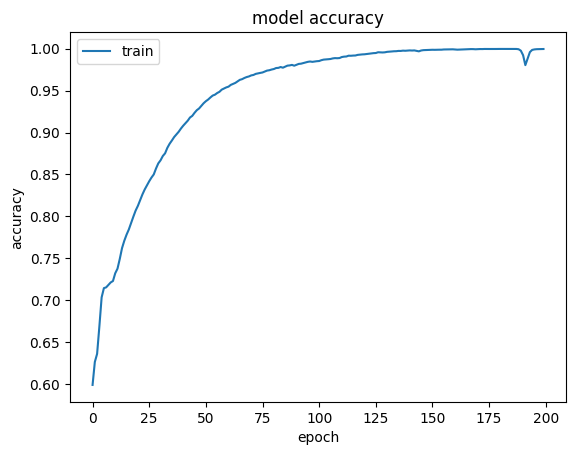

In [37]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

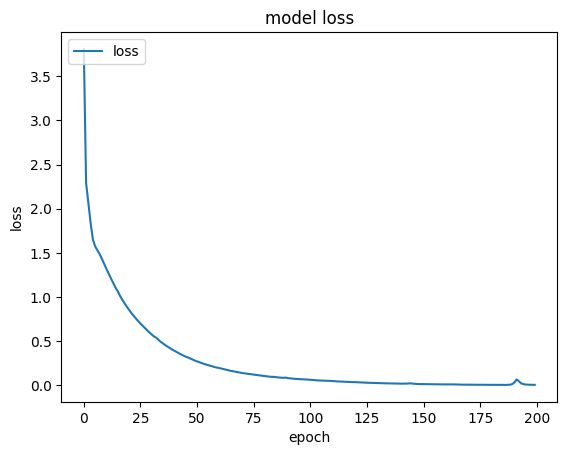

In [38]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [39]:
test_loss, test_accuraccy = model.evaluate([enc_in_test, dec_in_test], np.expand_dims(dec_out_test, -1))

print(f'Test Loss: {test_loss}')
print(f'Test Accuraccy: {test_accuraccy}')

2/2 [==============================] - 1s 75ms/step - loss: 0.0136 - accuracy: 0.9974
Test Loss: 0.013570224866271019
Test Accuraccy: 0.9973999857902527


# Inference Model

In [41]:
from keras.models import Model
from keras.layers import Input

In [42]:
enc_model = Model(enc_inp, enc_states)

In [43]:
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_lstm_outputs, state_h, state_c = dec_lstm(dec_embed, initial_state=decoder_states_inputs)

decoder_states = [state_h, state_c]
decoder_outputs = dense(decoder_lstm_outputs)
dec_model = Model([dec_inp] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [46]:
enc_model.save('encoder_model')
dec_model.save('decoder_model')

INFO:tensorflow:Assets written to: encoder_model\assets


INFO:tensorflow:Assets written to: encoder_model\assets


INFO:tensorflow:Assets written to: decoder_model\assets


INFO:tensorflow:Assets written to: decoder_model\assets
